### <center>Quadrature method for solving the second kind Volterra equation

In [1]:
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt

$\lambda = 1, ~K(x, s) = xs, ~f(x) = x, ~a = -1, ~b = 1$

In [2]:
def K(x, s):
    return x * s


def f(x):
    return x


def quadrature_method(K_func, f_func, x):
    # Number of nodes
    n = len(x)
    
    # Step
    h = x[1] - x[0]
    
    # Weights
    A = np.zeros(n)
    A.fill(h)
    A[0] = A[-1] = h / 2
    
    # Discrepancy
    R = np.zeros(n)
    
    # Numerical Solution
    u = np.zeros(n)
    u[0] = f_func(x[0])
    
    for i in range(1, n):
        s = 0
        for j in range(i):
            s += A[j] * K_func(x[i], x[j]) * u[j]
        u[i] = (f_func(x[i]) + s) / (1 - A[i] * K_func(x[i], x[i]))
        R[i] = u[i] - s - f_func(x[i])
    return u, R

In [3]:
n = 10
a, b = -1, 1
x = np.linspace(a, b, n + 1)

In [4]:
solution, discrepancy = quadrature_method(K, f, x)

print(f"Max_absolute_discrepancy: {abs(discrepancy).max()}")

Max_absolute_discrepancy: 0.20241709813442577


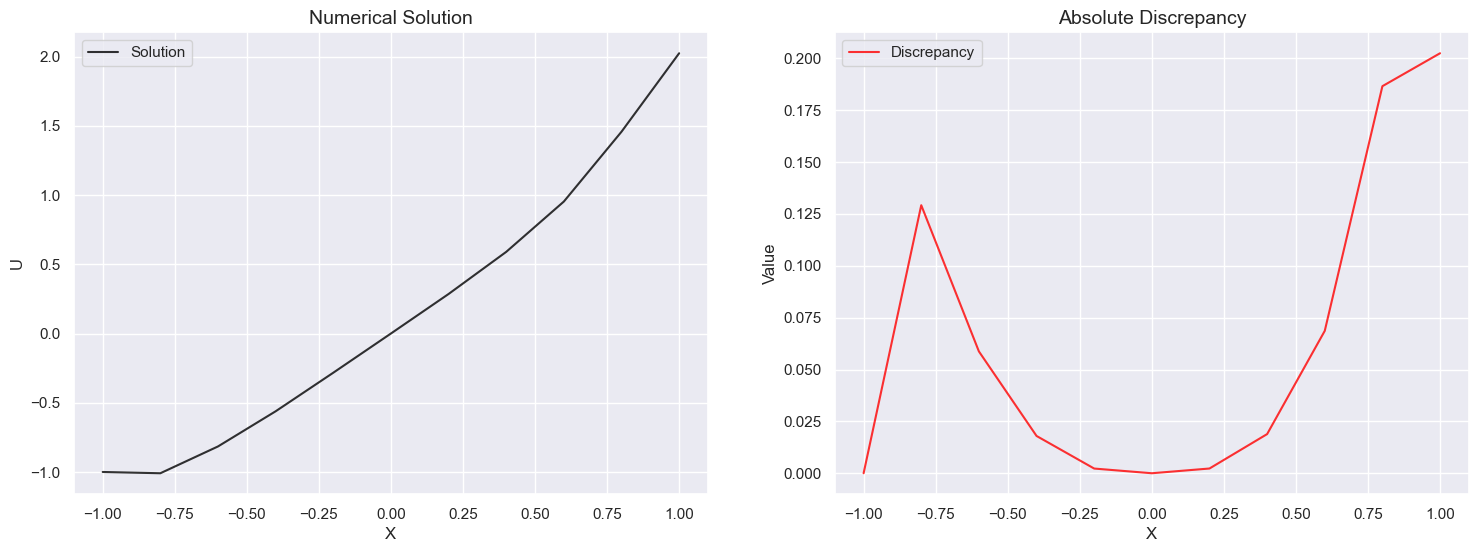

In [5]:
sns.set()

fig, axs = plt.subplots(1, 2, figsize=(18, 6))
sns.lineplot(ax=axs[0], y=solution, x=x, label="Solution", alpha=0.8, c="black");
axs[0].set_xlabel("X", fontsize=12);
axs[0].set_ylabel("U", fontsize=12);
axs[0].set_title("Numerical Solution", fontsize=14);
axs[0].legend();

sns.lineplot(ax=axs[1], y=abs(discrepancy), x=x, label="Discrepancy", alpha=0.8, c="red");
axs[1].set_xlabel("X", fontsize=12);
axs[1].set_ylabel("Value", fontsize=12);
axs[1].set_title("Absolute Discrepancy", fontsize=14);
axs[1].legend();

plt.show()